## **# Assignment 3: Time-Series Forecasting with RNN Variants**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


**Load and Visualize Data**

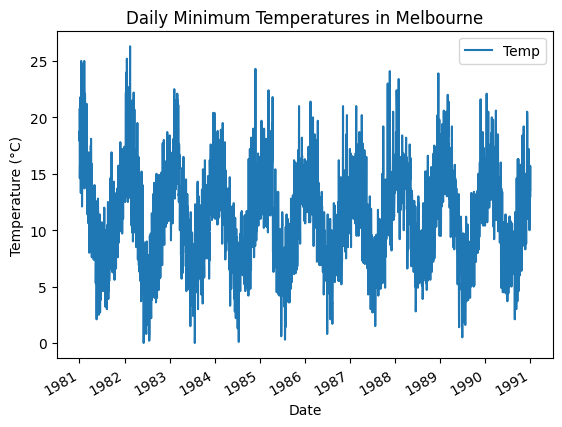

In [3]:
# Load daily temperature data
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
temperature_df = pd.read_csv(data_url, parse_dates=['Date'], index_col='Date')

# Plot temperature trend
temperature_df.plot(title="Daily Minimum Temperatures in Melbourne")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


**Data Preprocessing**

In [4]:
# Normalize the temperature data
scaler = MinMaxScaler()
normalized_temp = scaler.fit_transform(temperature_df[['Temp']])

# Convert data into sequences
def generate_sequences(data, window_size):
    inputs, targets = [], []
    for i in range(len(data) - window_size):
        inputs.append(data[i:i + window_size])
        targets.append(data[i + window_size])
    return np.array(inputs), np.array(targets)

window_size = 30
X_all, y_all = generate_sequences(normalized_temp, window_size)

# Split into train, validation, and test sets
train_end = int(len(X_all) * 0.7)
val_end = int(len(X_all) * 0.9)

X_train = X_all[:train_end]
y_train = y_all[:train_end]
X_val = X_all[train_end:val_end]
y_val = y_all[train_end:val_end]
X_test = X_all[val_end:]
y_test = y_all[val_end:]

print(f"Training samples: {X_train.shape}, Validation samples: {X_val.shape}, Test samples: {X_test.shape}")


Training samples: (2534, 30, 1), Validation samples: (724, 30, 1), Test samples: (362, 30, 1)


**LSTM Model**

In [5]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(30),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mae')

history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

val_predictions_lstm = lstm_model.predict(X_val)
lstm_mae = mean_absolute_error(y_val, val_predictions_lstm)
print(f"LSTM Validation MAE: {lstm_mae:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1784 - val_loss: 0.0808
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0877 - val_loss: 0.0799
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0892 - val_loss: 0.0793
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0849 - val_loss: 0.0775
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0855 - val_loss: 0.0795
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0882 - val_loss: 0.0890
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0876 - val_loss: 0.0772
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0841 - val_loss: 0.0753
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0820 - val_loss: 0.0756
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0826 - val_loss: 0.0729
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0826 - val_loss: 0.0731
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0805 - val_l

**GRU Model**

In [6]:
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    GRU(30),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mae')

history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

val_predictions_gru = gru_model.predict(X_val)
gru_mae = mean_absolute_error(y_val, val_predictions_gru)
print(f"GRU Validation MAE: {gru_mae:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1406 - val_loss: 0.0766
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0856 - val_loss: 0.0765
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0832 - val_loss: 0.0731
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0811 - val_loss: 0.0776
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0790 - val_loss: 0.0713
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0843 - val_loss: 0.0757
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0758 - val_loss: 0.0702
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0761 - val_loss: 0.0704
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0756 - val_loss: 0.0694
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0762 - val_loss: 0.0712
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0778 - val_loss: 0.0724
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0767 - val_l

**Conv1D + LSTM Model**

In [7]:
conv_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(30),
    Dense(1)
])
conv_lstm_model.compile(optimizer='adam', loss='mae')

history_conv_lstm = conv_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

val_predictions_conv = conv_lstm_model.predict(X_val)
conv_mae = mean_absolute_error(y_val, val_predictions_conv)
print(f"Conv1D + LSTM Validation MAE: {conv_mae:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1766 - val_loss: 0.0832
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0845 - val_loss: 0.0768
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0829 - val_loss: 0.0758
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0835 - val_loss: 0.0749
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0836 - val_loss: 0.0737
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0837 - val_loss: 0.0741
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0820 - val_loss: 0.0719
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0787 - val_loss: 0.0716
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0780 - val_loss: 0.0770
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0778 - val_loss: 0.0730
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0788 - val_loss: 0.0725
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0755 - val_loss: 0.0732

**Results Summary and Comparison**

           Model  Validation MAE
0           LSTM        0.069816
1            GRU        0.073835
2  Conv1D + LSTM        0.069968


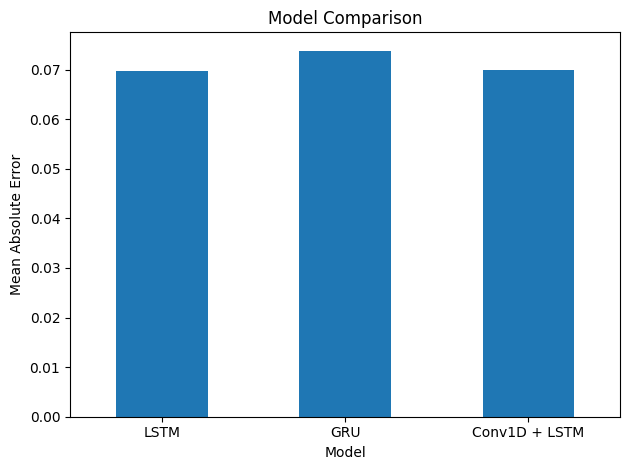

In [8]:
results_df = pd.DataFrame({
    'Model': ['LSTM', 'GRU', 'Conv1D + LSTM'],
    'Validation MAE': [lstm_mae, gru_mae, conv_mae]
})

print(results_df)
results_df.plot(kind='bar', x='Model', y='Validation MAE', title='Model Comparison', legend=False)
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
